## Lecture 8 Dynamic Programming and LQR


### Dynamic Programming Example: Shortest Path


In [10]:
import numpy as np
import matplotlib.pyplot as plt

costMatrix = np.array([[0, 4, -1, -1, -1, -1, 6, -1], 
                [4, 0, 3, -1, -1, -1, -1, 3],
                [-1, 3, 0, 6, -1, -1, -1, -1],
                [-1, -1, 6, 0, 2, -1, -1, 5],
                [-1,-1,-1,2,0,3,-1,4],
                [-1,-1,-1,-1,3,0,4,-1],
                [6,-1,-1,-1,-1,4,0,2], 
                [-1,3,-1,5,4,-1,2,0]])

In [11]:
costMatrix[np.diag_indices_from(costMatrix)] = 10
print(costMatrix)

[[10  4 -1 -1 -1 -1  6 -1]
 [ 4 10  3 -1 -1 -1 -1  3]
 [-1  3 10  6 -1 -1 -1 -1]
 [-1 -1  6 10  2 -1 -1  5]
 [-1 -1 -1  2 10  3 -1  4]
 [-1 -1 -1 -1  3 10  4 -1]
 [ 6 -1 -1 -1 -1  4 10  2]
 [-1  3 -1  5  4 -1  2 10]]


In [4]:
def valueIter(Vfunc, costMatrix,xf):
    n = costMatrix.shape[0]  #number of state
    J = -1*np.ones(n)
    Vnext = -1*np.ones(n)
    mustar = -1*np.ones(n)
    for xi in range(n): 
        if xi==xf:
            Vnext[xi] = Vfunc[xi]
            mustar[xi] = xi
        else:
            for ui in range(n):
                xnext = ui
                if costMatrix[xi,ui]==-1:
                    J[ui] = 10**6
                else:
                    J[ui] = costMatrix[xi,ui] + Vfunc[xnext]
            Vnext[xi] = np.amin(J)
            mustar[xi] = np.argmin(J)
    
    return Vnext, mustar  

In [12]:
n = 8
N = 4
xf = 3
g = 10**6*np.ones(n)
g[3] = 0

V=np.zeros((N,n))
mu = np.zeros((N,n)) 
V[0,:] = g

for j in range(N-1):
    V[j+1,:], mu[j+1,:] = valueIter(V[j,:],costMatrix,xf)




In [7]:
print(V)
print(mu)

[[1.0e+06 1.0e+06 1.0e+06 0.0e+00 1.0e+06 1.0e+06 1.0e+06 1.0e+06]
 [1.0e+06 1.0e+06 5.0e+00 0.0e+00 2.0e+00 1.0e+06 1.0e+06 5.0e+00]
 [1.0e+06 8.0e+00 5.0e+00 0.0e+00 2.0e+00 5.0e+00 7.0e+00 5.0e+00]
 [1.2e+01 8.0e+00 5.0e+00 0.0e+00 2.0e+00 5.0e+00 7.0e+00 5.0e+00]]
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [2. 3. 3. 3. 3. 0. 1. 3.]
 [2. 2. 3. 3. 3. 4. 7. 3.]
 [1. 2. 3. 3. 3. 4. 7. 3.]]


In [13]:
# find optimal path 
x = -1*np.ones(N)
x[0] = 0
for k in range(N-1):
    x[k+1] = mu[N-1-k,x[k].astype(int)]

print(x)


[0. 1. 7. 3.]


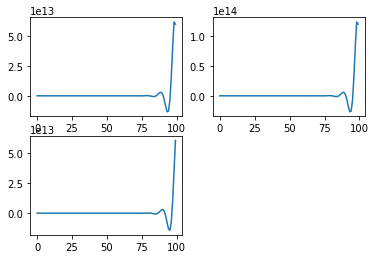

In [14]:
# LQR Example:
import numpy as np
import matplotlib.pyplot as plt
A =np.mat('1.9500, -0.0250,-1.6000; 1.6000, 1.1000,-3.2000; 0.4250,    0.1875,    0.3000')
B =np.mat('0 1 0; 1 1 1').T
nu = 2
nx = 3
# simulate original system without control (open loop)
N = 100;  #number of discrete time steps
x = np.mat(np.zeros((3,N)))
x[:,0] = np.array([[1],[2],[3]])
for k in np.arange(N-1):
    x[:,k+1] = A@x[:,k];
time = np.arange(N)
plt.subplot(2,2,1)
plt.plot(time,x[0,:].T);
plt.subplot(2,2,2)
plt.plot(time, x[1,:].T);
plt.subplot(2,2,3)
plt.plot(time, x[2,:].T);


In [17]:
# Design LQR controller
import scipy.linalg as la
nx = 3
#Q = np.zeros((3,3))
Q = np.eye(3);   #weight all the states the same
R = np.eye(2);   #control weighting matrix

#for testing purpose, let us first verify Riccati recurssion formula

Nr = 20; #number of Riccati recursion steps
P = np.zeros((nx,nx,Nr))
T = np.ones((3,3))#np.mat(np.random.randn(nx,nx));
P[:,:,0] = np.zeros((3,3))#T@T.T   

for j in np.arange(Nr-1):
    P[:,:,j+1] = Q + A.T@P[:,:,j]@A - A.T@P[:,:,j]@B@la.inv(R+B.T@P[:,:,j]@B)@B.T@P[:,:,j]@A    


In [18]:
print(P[:,:,19])
print(P[:,:,18])

[[ 47.07366208  -7.12318412 -57.71055272]
 [ -7.12318412   2.96775024   7.66965247]
 [-57.71055272   7.66965247  76.37876063]]
[[ 47.07364506  -7.12318035 -57.71053363]
 [ -7.12318035   2.9677494    7.66964824]
 [-57.71053363   7.66964824  76.3787392 ]]


In [20]:

Pstar = P[:,:,Nr-1];
Kstar = la.inv(R+B.T@Pstar@B)@B.T@Pstar@A;
Eigs = la.eig(A-B@Kstar)
print(Eigs)

(array([0.60401288+0.j       , 0.29159384+0.0626755j,
       0.29159384-0.0626755j]), array([[ 0.77769375+0.j        , -0.44877471+0.06839082j,
        -0.44877471-0.06839082j],
       [ 0.39677866+0.j        , -0.85855348+0.j        ,
        -0.85855348-0.j        ],
       [ 0.48760551+0.j        , -0.23042238+0.06095413j,
        -0.23042238-0.06095413j]]))


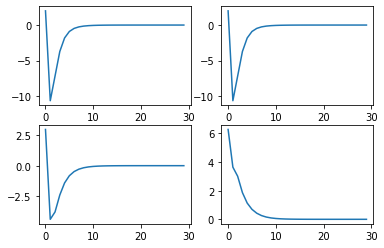

In [21]:
# check performance 
N = 30;  #number of discrete time steps

x = np.mat(np.zeros((3,N)))
u = np.mat(np.zeros((nu,N)))
norm_u = np.zeros(N)
x[:,0] =np.array([[1,2,3]]).T;  #same initial state as before
for k in np.arange(N-1):
    u[:,k] = -Kstar@x[:,k];
    norm_u[k] = la.norm(u[:,k]);
    x[:,k+1] = A@x[:,k] + B@u[:,k];    

time = np.arange(N)
plt.subplot(2,2,1)
plt.plot(time, x[1,:].T);
plt.subplot(2,2,2)
plt.plot(time, x[1,:].T);
plt.subplot(2,2,3)
plt.plot(time, x[2,:].T);
plt.subplot(2,2,4);
plt.plot(time,norm_u);




In [23]:
## define our own dlqr function
def myDLQR(A,B,Q,R,N):
    Nr = 20; #number of Riccati recursion steps
    P = np.zeros((nx,nx,Nr))
    T = np.mat(np.random.randn(nx,nx));
    P[:,:,0] = T@T.T   

    for j in np.arange(Nr-1):
        P[:,:,j+1] = Q + A.T@P[:,:,j]@A - A.T@P[:,:,j]@B@la.inv(R+B.T@P[:,:,j]@B)@B.T@P[:,:,j]@A 
    
    Pstar = P[:,:,Nr-1];
    Kstar = la.inv(R+B.T@Pstar@B)@B.T@Pstar@A;
    return Pstar, Kstar


ValueError: x and y must have same first dimension, but have shapes (100,) and (30, 1)

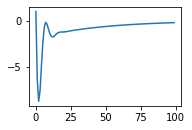

In [29]:
# verify the impact of weighting matrix
# change weighti
Q = np.mat('1 0 0; 0 1 0; 0 0 1')
R = 1000*np.mat('1 0; 0 1');
Pnew, Knew =myDLQR(A,B,Q,R,25);
N = 30;  #number of discrete time steps
xnew = np.mat(np.zeros((3,N)))
unew = np.mat(np.zeros((nu,N)))
norm_u_new = np.zeros(N)
xnew[:,0] =np.array([[1,2,3]]).T;  #same initial state as before
for k in np.arange(N-1):
    unew[:,k] = -Knew@xnew[:,k];
    norm_u_new[k] = la.norm(unew[:,k]);
    xnew[:,k+1] = A@xnew[:,k] + B@unew[:,k];    

time = np.arange(N)
plt.subplot(2,2,1)
plt.plot(time, xnew[0,:].T);
plt.plot(time, x[0,:].T,'r');
plt.subplot(2,2,2)
plt.plot(time, xnew[1,:].T);
plt.plot(time, x[1,:].T,'r');
plt.subplot(2,2,3)
plt.plot(time, xnew[2,:].T);
plt.plot(time, x[2,:].T,'r');
plt.subplot(2,2,4);
plt.plot(time,norm_u_new);
plt.plot(time,norm_u,'r');